<a href="https://colab.research.google.com/github/charanreddyn/BIT-Internship-Group-7/blob/main/Object_detection_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchvision
from torchvision import transforms as T

from PIL import Image
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
model=torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

In [ ]:
model.eval()

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [ ]:
!wget='http://images.cocodataset.org/val2017/istockphoto-1358014313-612x612.jpg'

In [ ]:
ig=Image.open('/content/istockphoto-1358014313-612x612.jpg')

In [ ]:
transform=T.ToTensor()
img=transform(ig)


In [ ]:
with torch.no_grad():
  pred=model([img])

In [ ]:
pred
#type len

[{'boxes': tensor([[2.7081e+02, 3.6764e+01, 4.0737e+02, 2.7160e+02],
          [1.6889e+01, 1.1739e+02, 3.1106e+02, 4.0421e+02],
          [3.6470e+02, 2.0545e+02, 5.1571e+02, 2.9114e+02],
          [6.5733e+01, 1.8188e+02, 1.3667e+02, 2.3116e+02],
          [4.7720e+02, 1.1145e+02, 5.7199e+02, 2.5784e+02],
          [2.0858e+02, 1.3131e+02, 3.5439e+02, 2.8609e+02],
          [1.0463e+02, 9.3166e+01, 1.4457e+02, 1.7992e+02],
          [3.3321e+02, 1.0091e+02, 4.5530e+02, 2.6840e+02],
          [9.6311e+00, 1.1315e+02, 1.2073e+02, 2.5560e+02],
          [4.7562e+02, 3.1485e+02, 6.1200e+02, 4.0510e+02],
          [0.0000e+00, 1.8285e+02, 3.3388e+01, 1.9721e+02],
          [9.0843e-02, 2.2125e+02, 8.8971e+01, 2.5235e+02],
          [1.4236e+02, 3.1050e+02, 2.0340e+02, 3.9879e+02],
          [1.4583e+02, 3.1519e+02, 3.3242e+02, 3.9817e+02],
          [1.6146e+02, 1.2319e+02, 3.3953e+02, 3.5390e+02],
          [2.0539e+02, 2.3349e+02, 5.9544e+02, 3.9883e+02],
          [4.6224e-01, 1.6727e+

In [ ]:
bboxes,labels,scores=pred[0]["boxes"],pred[0]["labels"], pred[0]["scores"]

In [ ]:
bboxes

tensor([[2.7081e+02, 3.6764e+01, 4.0737e+02, 2.7160e+02],
        [1.6889e+01, 1.1739e+02, 3.1106e+02, 4.0421e+02],
        [3.6470e+02, 2.0545e+02, 5.1571e+02, 2.9114e+02],
        [6.5733e+01, 1.8188e+02, 1.3667e+02, 2.3116e+02],
        [4.7720e+02, 1.1145e+02, 5.7199e+02, 2.5784e+02],
        [2.0858e+02, 1.3131e+02, 3.5439e+02, 2.8609e+02],
        [1.0463e+02, 9.3166e+01, 1.4457e+02, 1.7992e+02],
        [3.3321e+02, 1.0091e+02, 4.5530e+02, 2.6840e+02],
        [9.6311e+00, 1.1315e+02, 1.2073e+02, 2.5560e+02],
        [4.7562e+02, 3.1485e+02, 6.1200e+02, 4.0510e+02],
        [0.0000e+00, 1.8285e+02, 3.3388e+01, 1.9721e+02],
        [9.0843e-02, 2.2125e+02, 8.8971e+01, 2.5235e+02],
        [1.4236e+02, 3.1050e+02, 2.0340e+02, 3.9879e+02],
        [1.4583e+02, 3.1519e+02, 3.3242e+02, 3.9817e+02],
        [1.6146e+02, 1.2319e+02, 3.3953e+02, 3.5390e+02],
        [2.0539e+02, 2.3349e+02, 5.9544e+02, 3.9883e+02],
        [4.6224e-01, 1.6727e+02, 2.2496e+01, 1.8467e+02],
        [1.169

In [ ]:
num=torch.argwhere(scores>0.8).shape[0]

In [ ]:
num

10

In [ ]:
coco_names=['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck',
            'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench',
            'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra',
            'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee',
            'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove',
            'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
            'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange',
            'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa',
            'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse',
            'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink',
            'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush','laptop']

In [ ]:
font=cv2.FONT_HERSHEY_SIMPLEX

In [ ]:
import cv2

igg = cv2.imread("/content/istockphoto-1358014313-612x612.jpg")

for i in range(num):
    x1, y1, x2, y2 = bboxes[i].numpy().astype("int")
    print(x1, y1, x2, y2)

    class_name = coco_names[labels.numpy()[i] - 1]

    igg = cv2.rectangle(igg, (x1, y1), (x2, y2), (0, 255, 0), 1)
    igg = cv2.putText(igg, class_name, (x1, y1 - 10), font, 0.5, (255, 0, 0), 1, cv2.LINE_AA)


270 36 407 271
16 117 311 404
364 205 515 291
65 181 136 231
477 111 571 257
208 131 354 286
104 93 144 179
333 100 455 268
9 113 120 255
475 314 612 405


In [ ]:
for i in range(min(num, len(bboxes), len(labels))):
    x1, y1, x2, y2 = bboxes[i].numpy().astype("int")

    if 0 <= x1 < igg.shape[1] and 0 <= x2 < igg.shape[1] and 0 <= y1 < igg.shape[0] and 0 <= y2 < igg.shape[0]:
        index = labels.numpy()[i] - 1

        if 0 <= index < len(coco_names):
            class_name = coco_names[index]

            igg = cv2.rectangle(igg, (x1, y1), (x2, y2), (0, 255, 0), 1)
            igg = cv2.putText(igg, class_name, (x1, y1 - 10), font, 0.5, (255, 0, 0), 1, cv2.LINE_AA)
        else:
            print(f"Invalid index {index} at iteration {i}")
    else:
        print(f"Invalid coordinates at iteration {i}")


Invalid coordinates at iteration 9


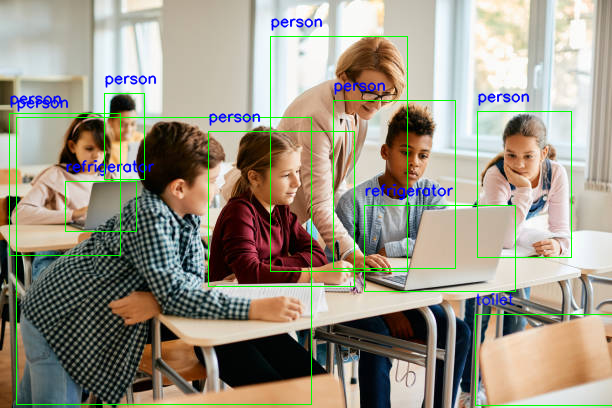

In [ ]:
from google.colab.patches import cv2_imshow

cv2_imshow(igg)
cv2.waitKey(0)
cv2.destroyAllWindows()


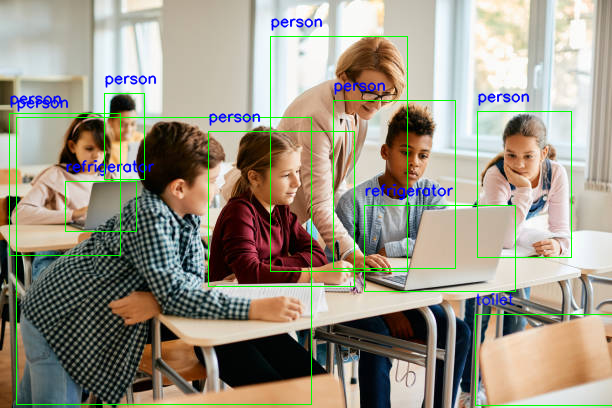

In [ ]:
cv2_imshow(igg)

In [ ]:
labels

tensor([ 1,  1, 73, 73,  1,  1,  1,  1,  1, 62, 67, 67, 62, 62,  1, 67, 62, 67,
         1, 62, 62, 62,  1, 67,  1, 67, 62, 62, 67, 62, 62, 67,  1, 62, 67, 76,
        67, 67, 67, 67,  1,  1,  1, 62, 62, 67, 62, 62,  1, 62, 67, 31, 67, 62,
        62, 67, 51, 62, 84, 73,  1, 67, 62, 62, 63, 31, 62, 67, 67, 62, 67, 62,
        62,  1, 77, 62, 84, 67])

In [ ]:
bboxes

tensor([[2.7081e+02, 3.6764e+01, 4.0737e+02, 2.7160e+02],
        [1.6889e+01, 1.1739e+02, 3.1106e+02, 4.0421e+02],
        [3.6470e+02, 2.0545e+02, 5.1571e+02, 2.9114e+02],
        [6.5733e+01, 1.8188e+02, 1.3667e+02, 2.3116e+02],
        [4.7720e+02, 1.1145e+02, 5.7199e+02, 2.5784e+02],
        [2.0858e+02, 1.3131e+02, 3.5439e+02, 2.8609e+02],
        [1.0463e+02, 9.3166e+01, 1.4457e+02, 1.7992e+02],
        [3.3321e+02, 1.0091e+02, 4.5530e+02, 2.6840e+02],
        [9.6311e+00, 1.1315e+02, 1.2073e+02, 2.5560e+02],
        [4.7562e+02, 3.1485e+02, 6.1200e+02, 4.0510e+02],
        [0.0000e+00, 1.8285e+02, 3.3388e+01, 1.9721e+02],
        [9.0843e-02, 2.2125e+02, 8.8971e+01, 2.5235e+02],
        [1.4236e+02, 3.1050e+02, 2.0340e+02, 3.9879e+02],
        [1.4583e+02, 3.1519e+02, 3.3242e+02, 3.9817e+02],
        [1.6146e+02, 1.2319e+02, 3.3953e+02, 3.5390e+02],
        [2.0539e+02, 2.3349e+02, 5.9544e+02, 3.9883e+02],
        [4.6224e-01, 1.6727e+02, 2.2496e+01, 1.8467e+02],
        [1.169